<a href="https://colab.research.google.com/github/ombhosale9172/Heart-Stroke-Prediction/blob/master/heart_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ombhosalepatil
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


100%|██████████| 8.56k/8.56k [00:00<00:00, 21.4MB/s]

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/heart-failure-prediction/heart.csv")
display(df.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.shape

(918, 12)

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [ ]:
df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [ ]:
numeric_col = df.select_dtypes(include = [np.number])

In [ ]:
numeric_col

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [ ]:
cat_col = df.select_dtypes(exclude = [np.number])

In [ ]:
cat_col

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


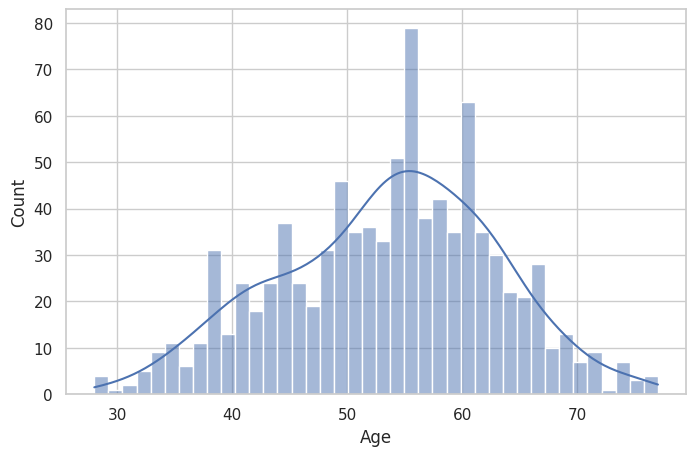

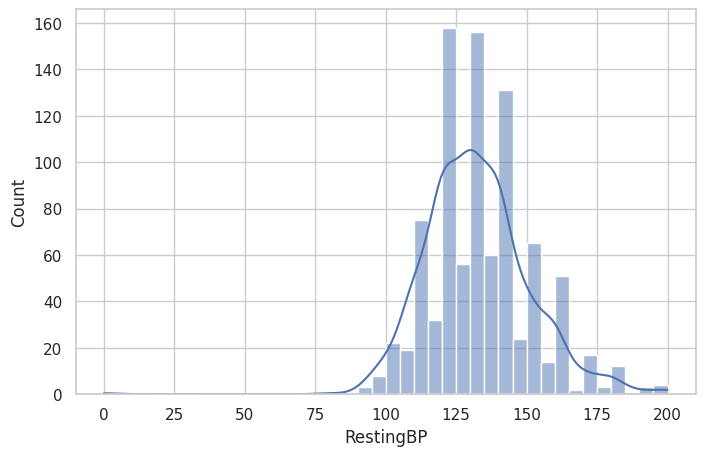

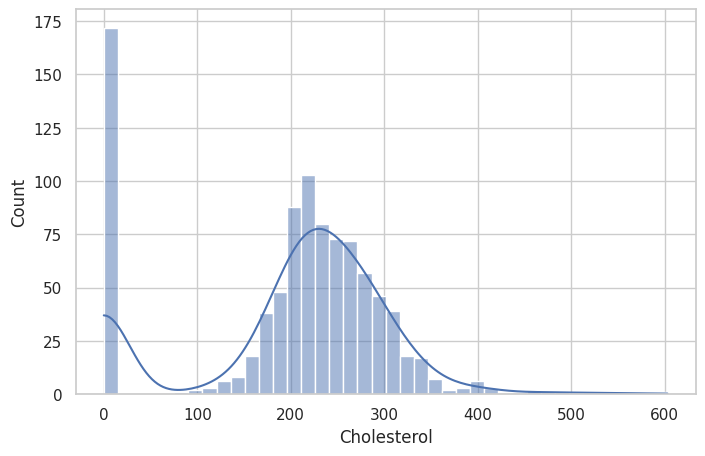

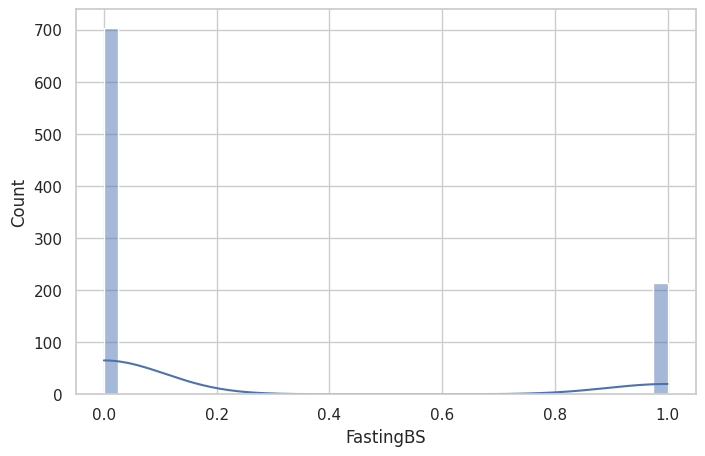

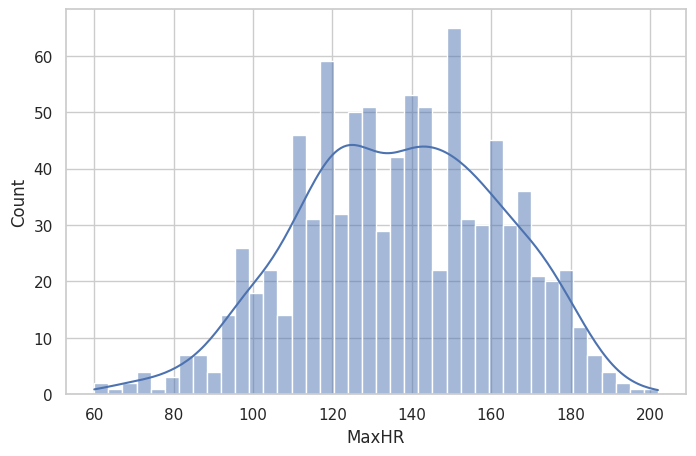

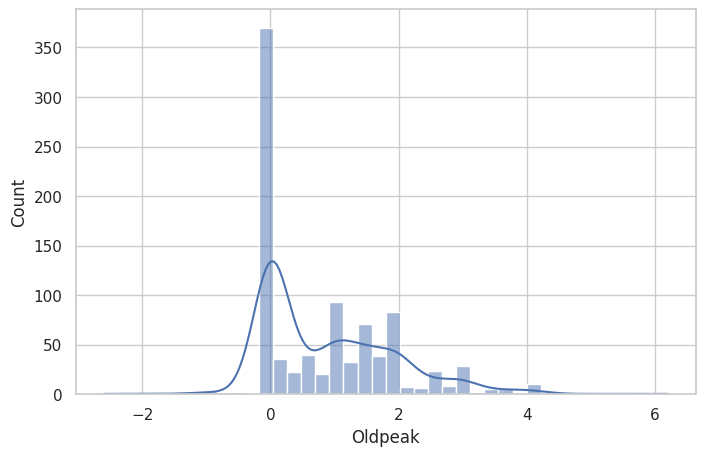

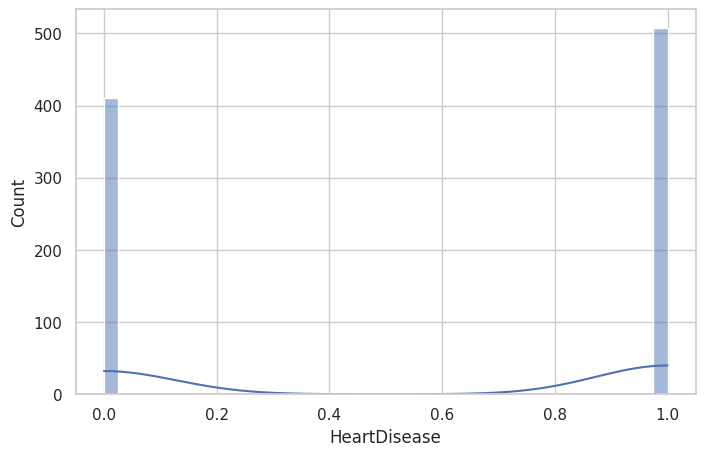

In [ ]:
sns.set(style = "whitegrid")
for I in numeric_col:
     plt.figure(figsize = (8,5))
     sns.histplot(df[I],kde = True,bins = 40)

/tmp/ipython-input-586342650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =df[I],palette ='viridis')
/tmp/ipython-input-586342650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =df[I],palette ='viridis')
/tmp/ipython-input-586342650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =df[I],palette ='viridis')
/tmp/ipython-input-586342650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

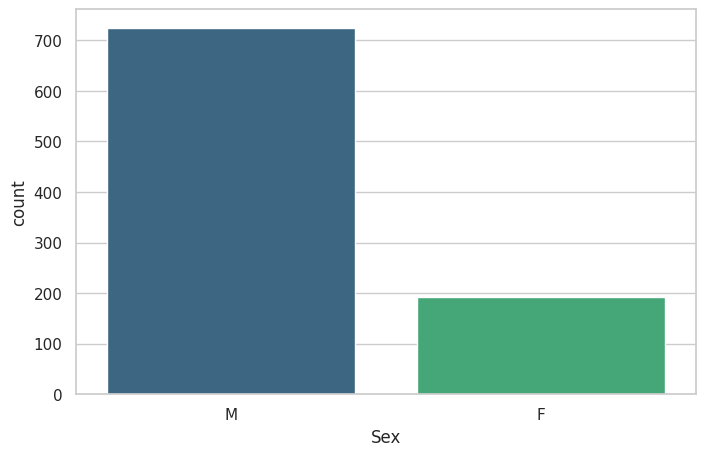

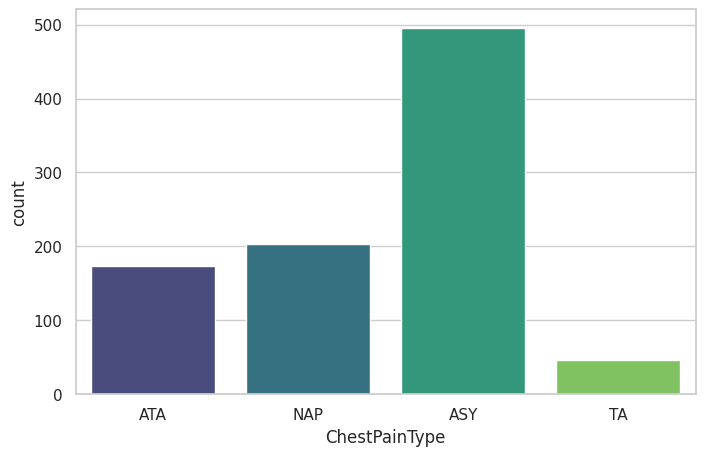

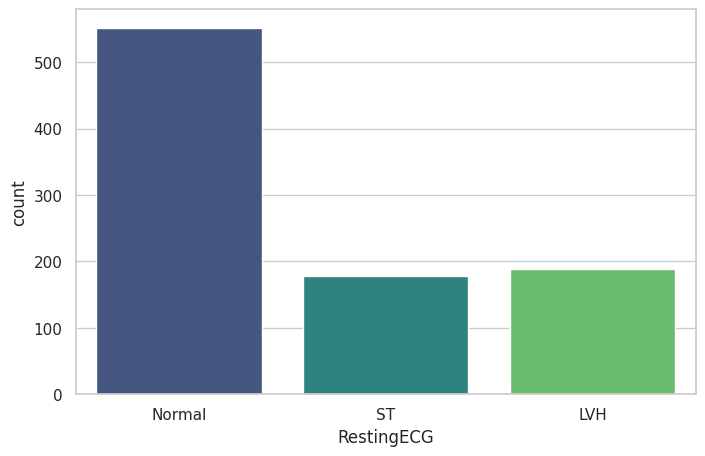

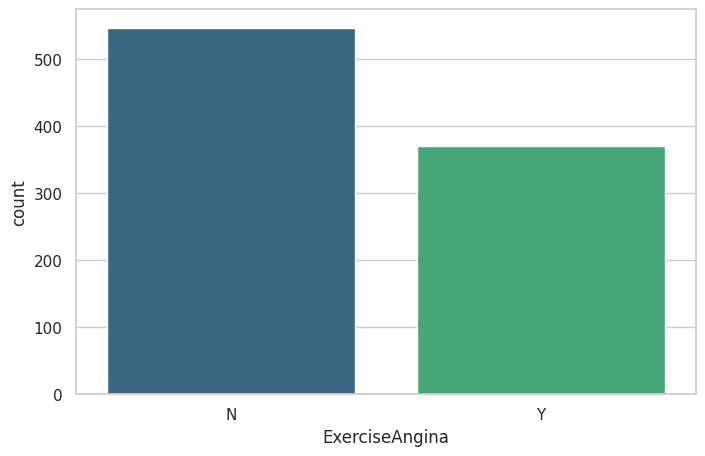

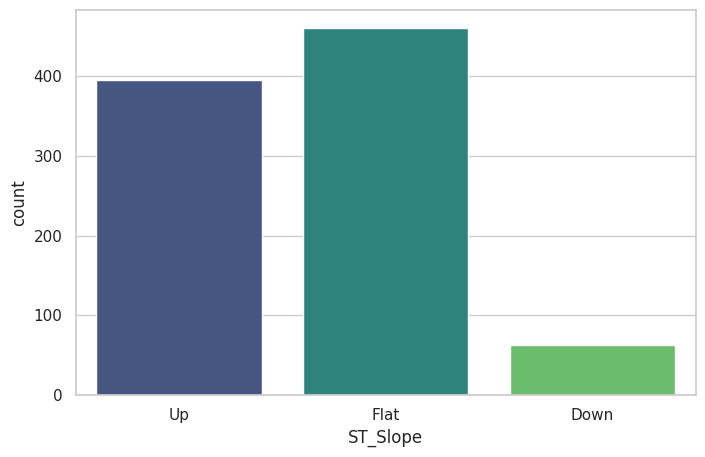

In [ ]:
for I in cat_col:
     plt.figure(figsize = (8,5))
     sns.countplot(x =df[I],palette ='viridis')

<Axes: xlabel='ChestPainType', ylabel='count'>

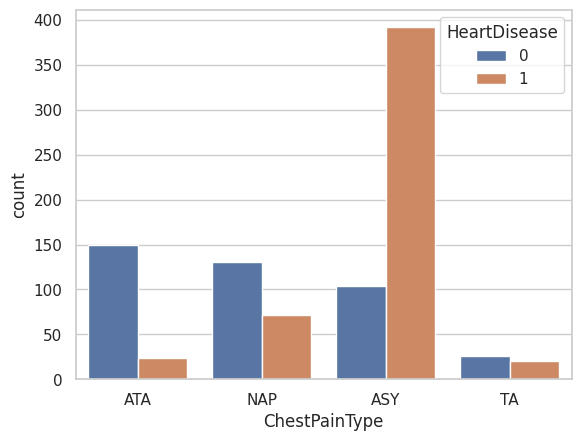

In [ ]:
sns.countplot(x = "ChestPainType",data = df,hue = 'HeartDisease')

<Axes: xlabel='RestingECG', ylabel='count'>

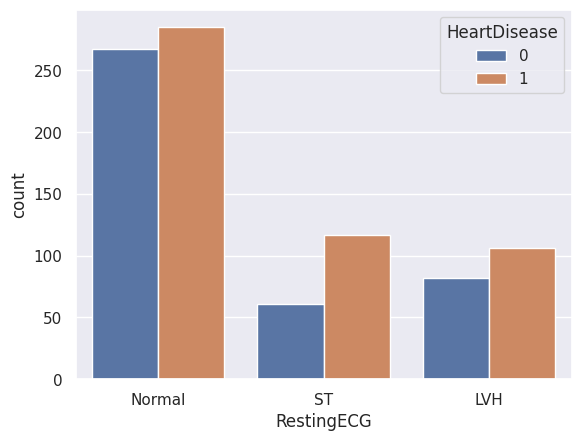

In [ ]:
sns.countplot(x = "RestingECG",data = df,hue = 'HeartDisease')

<Axes: xlabel='ExerciseAngina', ylabel='count'>

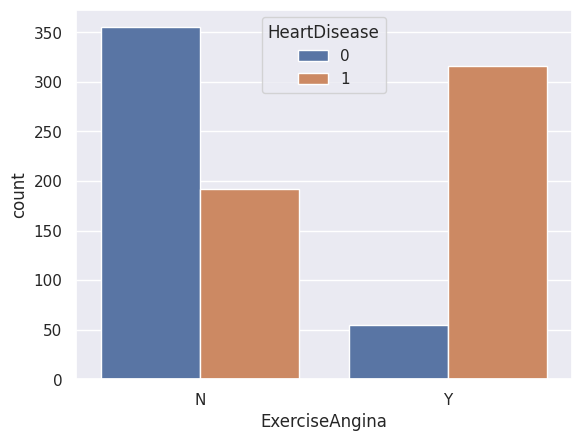

In [ ]:
sns.countplot(x = "ExerciseAngina",data = df,hue = 'HeartDisease')

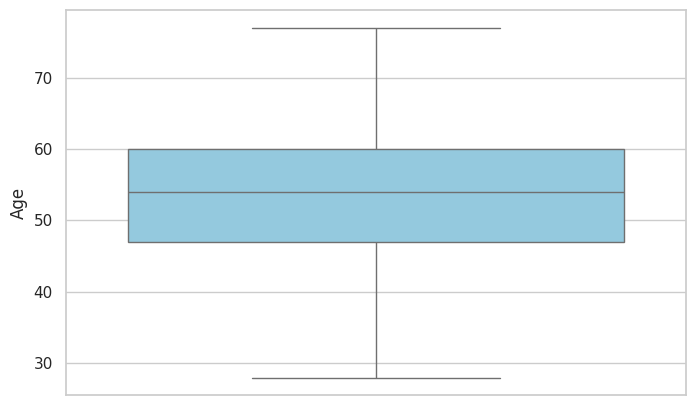

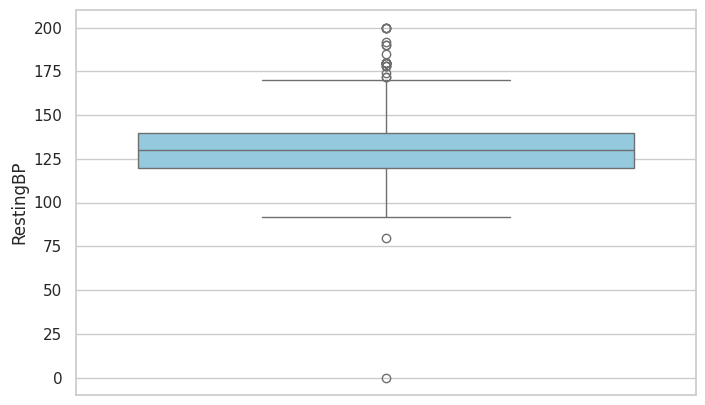

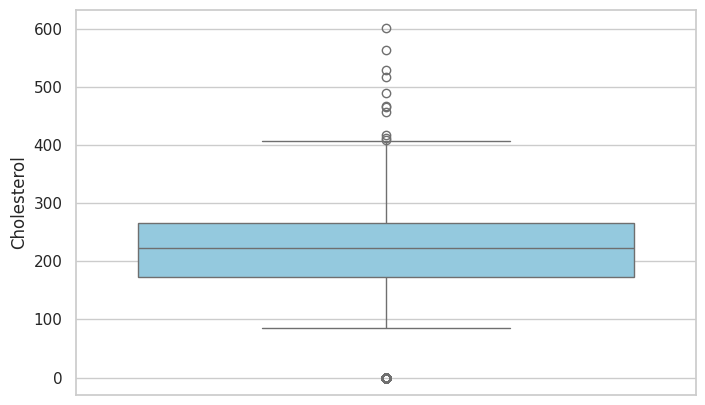

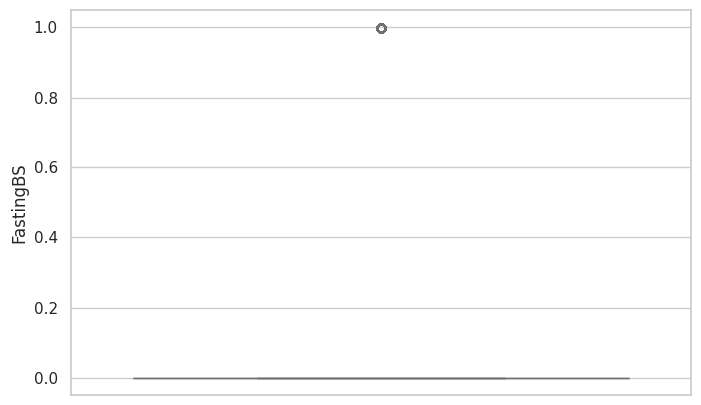

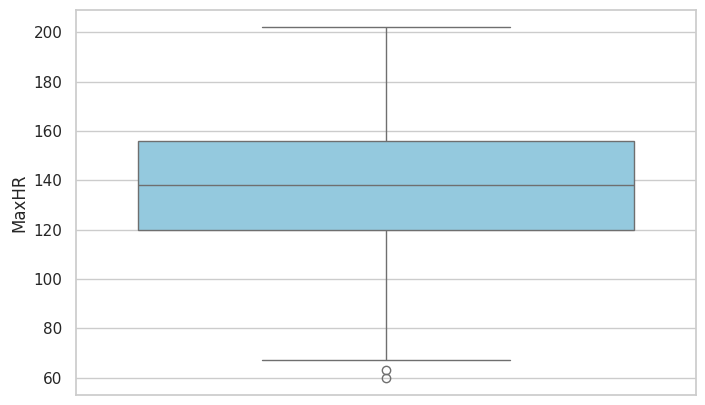

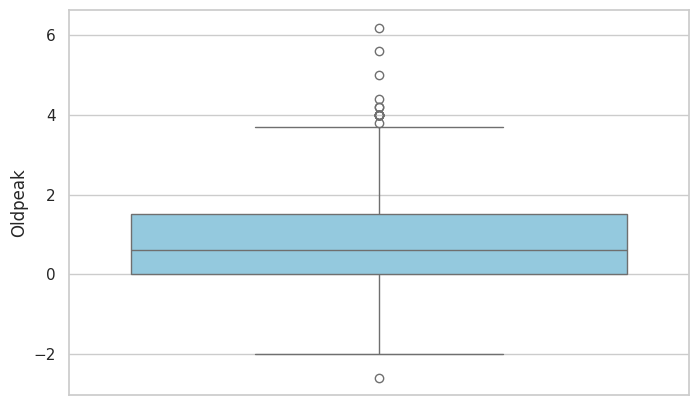

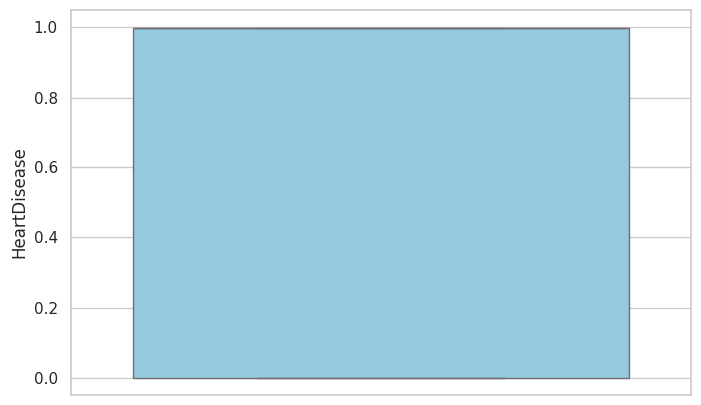

In [ ]:
for I in numeric_col:
     plt.figure(figsize= (8,5))
     sns.boxplot(df[I],color = 'skyblue')

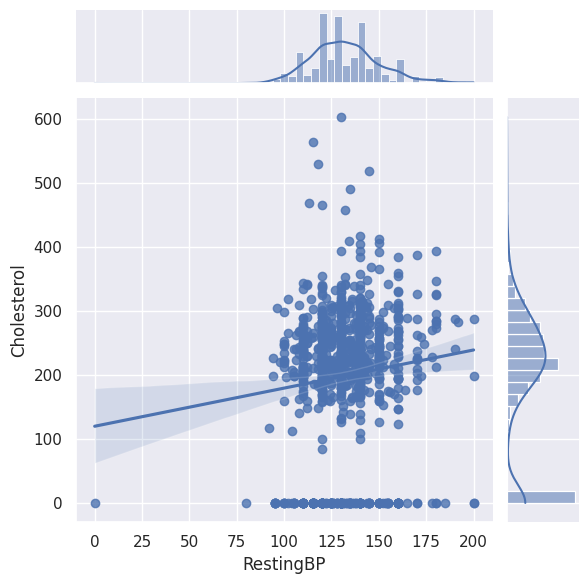

In [ ]:

sns.set(style = 'darkgrid')
sns.jointplot(x ="RestingBP",y = "Cholesterol",data = df,kind = 'reg')

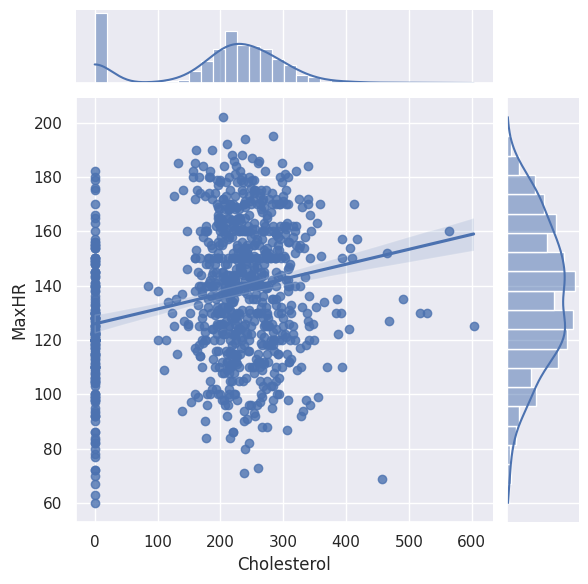

In [ ]:
sns.set(style='darkgrid')
sns.jointplot(x ="Cholesterol",y = "MaxHR", data = df,kind = 'reg')

<Axes: xlabel='Sex', ylabel='count'>

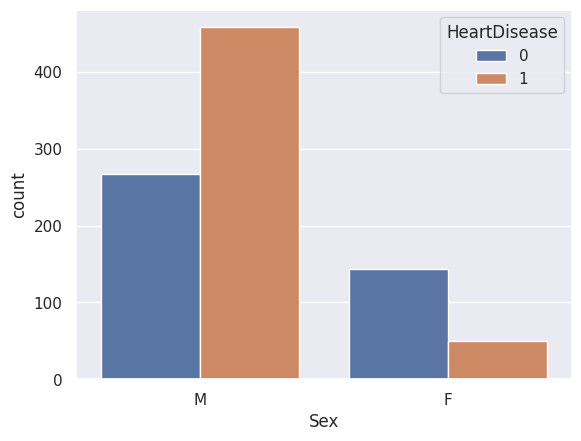

In [ ]:
sns.countplot(x = 'Sex',hue ='HeartDisease',data = df)

In [ ]:
sns.pairplot(df,hue = 'HeartDisease' , palette = "rainbow")

<Axes: >

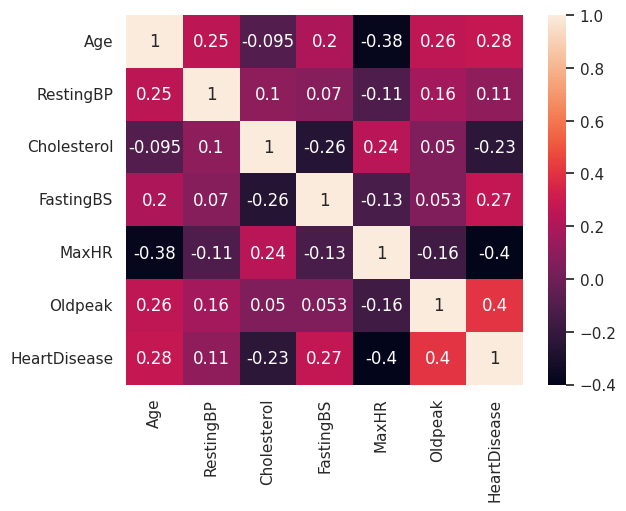

In [ ]:
sns.heatmap(df.corr(numeric_only = True),annot = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

for i in cat_col:
     le = LabelEncoder()
     df[i]=le.fit_transform(df[i])

In [ ]:
X = df.drop(columns ='HeartDisease')
y = df['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (RBF Kernel)": SVC(probability=True)
}
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1 Score': round(f1, 4)
    })
results

[{'Model': 'Logistic Regression', 'Accuracy': 0.8696, 'F1 Score': 0.8879},
 {'Model': 'KNN', 'Accuracy': 0.8913, 'F1 Score': 0.9029},
 {'Model': 'Naive Bayes', 'Accuracy': 0.8913, 'F1 Score': 0.9029},
 {'Model': 'Decision Tree', 'Accuracy': 0.7826, 'F1 Score': 0.8039},
 {'Model': 'SVM (RBF Kernel)', 'Accuracy': 0.8859, 'F1 Score': 0.9014}]

In [ ]:
import joblib
joblib.dump(models['KNN'],'KNN_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')